In [3]:
import subprocess
import sys
import os
from IPython.display import clear_output

In [4]:
times = {
    0:[],
    1:[]
}

for val in [0,1]:
    os.environ["PYTHONGIL"] = str(val)
    for threads in range(1,51):
        clear_output(wait=True)
        if val == 0:
            print("NoGil is active")
        else:
            print("NoGil is not active")
        print("Threads:", threads)
        output = subprocess.check_output(f"python fib.py {threads}", shell=True)
        tm = float(output.decode(sys.stdout.encoding).replace('\n',''))
        times[val].append(tm)


NoGil is not active
Threads: 50


In [5]:
times

{0: [0.751,
  0.76,
  0.763,
  0.795,
  1.072,
  1.394,
  1.568,
  1.628,
  1.84,
  2.253,
  2.415,
  2.753,
  2.861,
  3.564,
  3.995,
  3.436,
  3.898,
  3.703,
  3.889,
  4.243,
  4.55,
  4.312,
  4.45,
  4.636,
  5.24,
  5.033,
  5.269,
  5.416,
  5.622,
  5.989,
  6.027,
  6.212,
  6.383,
  6.566,
  6.79,
  6.976,
  7.147,
  7.354,
  7.573,
  7.735,
  7.925,
  8.118,
  8.326,
  8.498,
  8.753,
  9.069,
  9.096,
  9.326,
  9.458,
  9.65],
 1: [0.756,
  1.495,
  2.26,
  3.029,
  3.777,
  4.524,
  5.289,
  6.041,
  6.799,
  7.561,
  8.315,
  9.06,
  9.804,
  10.647,
  11.352,
  12.152,
  12.893,
  13.657,
  14.395,
  15.168,
  15.979,
  16.684,
  17.608,
  18.241,
  18.972,
  19.76,
  20.582,
  21.328,
  22.15,
  22.888,
  23.663,
  24.407,
  25.175,
  26.078,
  27.244,
  27.611,
  28.361,
  29.155,
  29.919,
  30.613,
  31.374,
  32.372,
  32.932,
  33.747,
  34.442,
  35.406,
  36.028,
  36.843,
  37.78,
  38.342]}

In [6]:
import matplotlib.pyplot as plt
import matplotlib

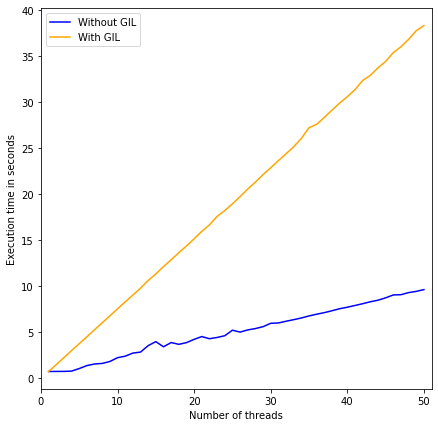

In [7]:
plt.figure(figsize=(7,7))
plt.plot(list(range(1,51)), times[0], color="blue")
plt.plot(list(range(1,51)), times[1], color="orange")
plt.xlabel("Number of threads")
plt.ylabel("Execution time in seconds")
plt.legend(["Without GIL","With GIL"])
plt.xlim((0,51))
plt.savefig("graph.png")
plt.show()